In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# EDA & Preprocess

In [2]:
df = pd.read_csv('Superheroes.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28118 entries, 0 to 28117
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Alignment       20562 non-null  object
 1   Alter_Egos      3398 non-null   object
 2   Base            6015 non-null   object
 3   Character       28118 non-null  object
 4   Class_value     27940 non-null  object
 5   Collections     8915 non-null   object
 6   Combat          27940 non-null  object
 7   Creator         23597 non-null  object
 8   Durability      27940 non-null  object
 9   Equipment       1628 non-null   object
 10  Eye_color       19892 non-null  object
 11  Formerly        1462 non-null   object
 12  Full_name       4886 non-null   object
 13  Gender          20339 non-null  object
 14  Hair_color      19788 non-null  object
 15  Height          27940 non-null  object
 16  IQ              27940 non-null  object
 17  Intelligence    27940 non-null  object
 18  Leader

In [4]:
df.loc[(df['Alignment'] == '-') & (df['Collections'].str.contains('villain', case=False, na=False)), 'Alignment'] = 'Bad'

In [5]:
df.replace('-', np.nan, inplace=True)

In [6]:
(df.count() / len(df))

Alignment         0.693150
Alter_Egos        0.120848
Base              0.213778
Character         1.000000
Class_value       0.993670
Collections       0.317057
Combat            0.993670
Creator           0.839213
Durability        0.993670
Equipment         0.057899
Eye_color         0.536774
Formerly          0.051995
Full_name         0.173625
Gender            0.682801
Hair_color        0.548581
Height            0.288143
IQ                0.993670
Intelligence      0.993670
Leader            0.017391
Level             0.993670
Member            0.051995
Name              0.681699
Occupation        0.367985
Omnipotent        0.993670
Omnipresent       0.993670
Omniscient        0.993670
Place_of_birth    0.216658
Power             0.993670
Relatives         0.267338
Species           0.600078
Speed             0.993670
Speed_velocity    0.993670
Strength          0.993670
Strength_force    0.993670
Super_powers      0.819475
Tier              0.993670
Universe          0.875169
W

In [7]:
drop_cols = df.columns[(df.count() / len(df)) < 0.6]
print(drop_cols)

Index(['Alter_Egos', 'Base', 'Collections', 'Equipment', 'Eye_color',
       'Formerly', 'Full_name', 'Hair_color', 'Height', 'Leader', 'Member',
       'Occupation', 'Place_of_birth', 'Relatives', 'Weight', 'History'],
      dtype='object')


In [8]:
# df.drop(27939, inplace=True)
df.drop(drop_cols, axis=1, inplace=True)
df = df[(df['Alignment'] == 'Bad') | (df['Alignment'] == 'Good') | (df['Alignment'] == 'Neutral')]

In [9]:
df.nunique()

Alignment             3
Character          7897
Class_value       10856
Combat               34
Creator             102
Durability           34
Gender                3
IQ                  153
Intelligence         27
Level                 6
Name               4709
Omnipotent            1
Omnipresent           2
Omniscient            2
Power                34
Species              93
Speed                34
Speed_velocity      786
Strength             33
Strength_force      837
Super_powers       9255
Tier                 11
Universe            779
dtype: int64

In [10]:
(df.count() / len(df))

Alignment         1.000000
Character         1.000000
Class_value       1.000000
Combat            1.000000
Creator           0.873518
Durability        1.000000
Gender            0.929499
IQ                1.000000
Intelligence      1.000000
Level             1.000000
Name              0.686182
Omnipotent        1.000000
Omnipresent       1.000000
Omniscient        1.000000
Power             1.000000
Species           0.820258
Speed             1.000000
Speed_velocity    1.000000
Strength          1.000000
Strength_force    1.000000
Super_powers      0.896608
Tier              1.000000
Universe          0.898456
dtype: float64

In [11]:
df['Creator'].fillna('Unknown', inplace=True)

C:\Users\NoA\AppData\Local\Temp\ipykernel_13760\776378770.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Creator'].fillna('Unknown', inplace=True)


In [12]:
df['Creator'].value_counts()

Creator
Marvel Comics                     3906
DC Comics                         2975
Unknown                           2465
Shueisha                          2349
Nintendo                           515
                                  ... 
Mark Jones                           2
Koei Tecmo                           2
Warhammer 40K                        1
Amazon                               1
Sony Interactive Entertainment       1
Name: count, Length: 103, dtype: int64

In [13]:
df['Gender'].value_counts()

Gender
Male      13015
Female     4618
Other       482
Name: count, dtype: int64

In [14]:
df['Gender'].fillna('Other', inplace=True)

C:\Users\NoA\AppData\Local\Temp\ipykernel_13760\231159764.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna('Other', inplace=True)


<Axes: ylabel='count'>

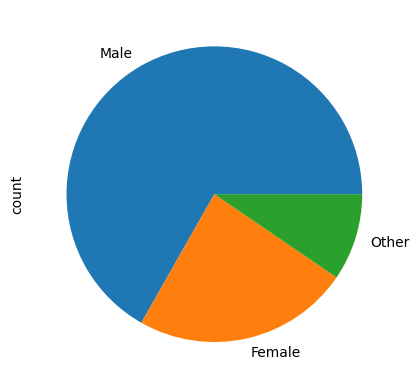

In [15]:
df['Gender'].value_counts().plot(kind='pie')

In [16]:
df.drop('Name', axis=1, inplace=True)

In [17]:
df['Species'].fillna('Unknown', inplace=True)

C:\Users\NoA\AppData\Local\Temp\ipykernel_13760\1776311266.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Species'].fillna('Unknown', inplace=True)


In [18]:
df['Species'].replace('God / Eternal', 'God', inplace=True)

<Axes: xlabel='Species'>

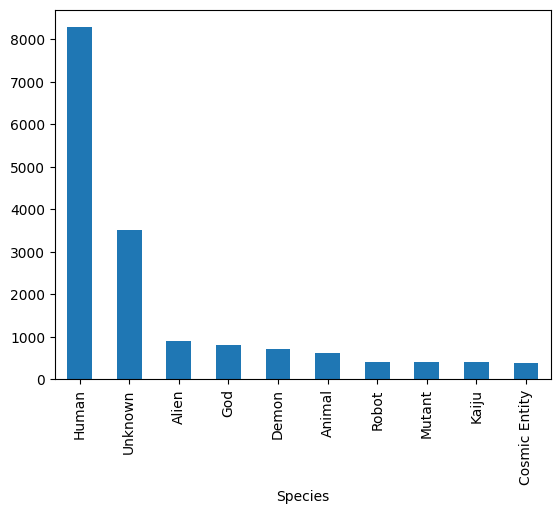

In [19]:
df['Species'].value_counts().head(10).plot(kind='bar')

In [20]:
df['Universe'].dropna(inplace=True)

<Axes: xlabel='Universe'>

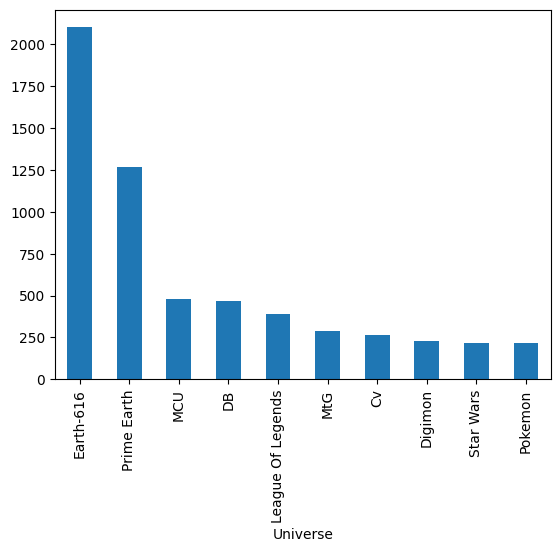

In [21]:
df['Universe'].value_counts().head(10).plot(kind='bar')

In [22]:
display(df['Omnipotent'].value_counts())
display(df['Omnipresent'].value_counts())
display(df['Omniscient'].value_counts())

Omnipotent
0    19489
Name: count, dtype: int64

Omnipresent
0    19141
1      348
Name: count, dtype: int64

Omniscient
0    19324
1      165
Name: count, dtype: int64

In [23]:
df.drop('Omnipotent',axis=1, inplace=True)

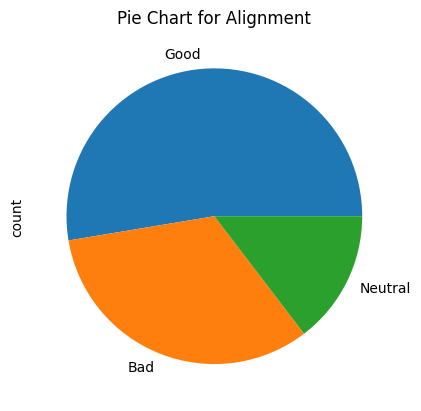

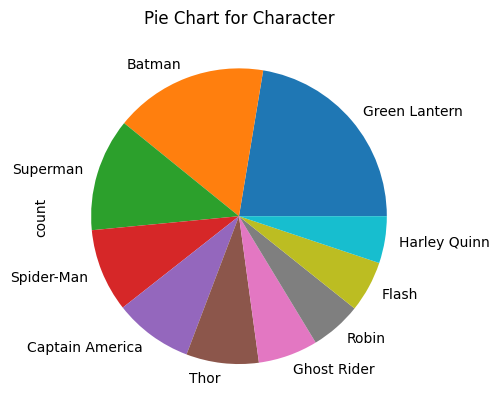

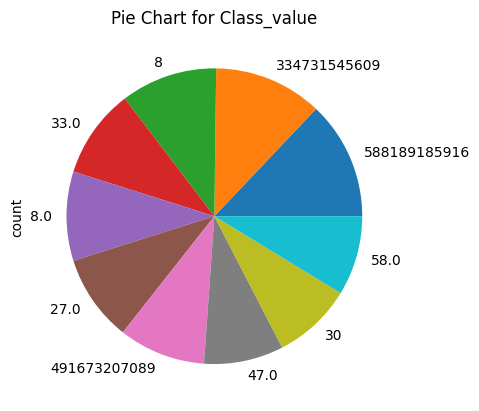

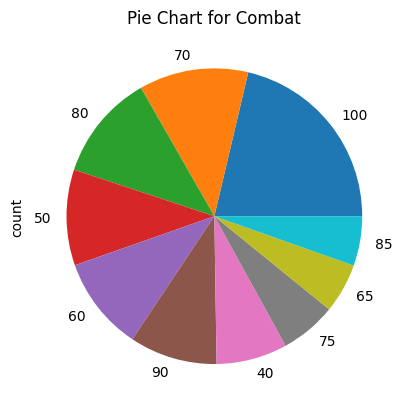

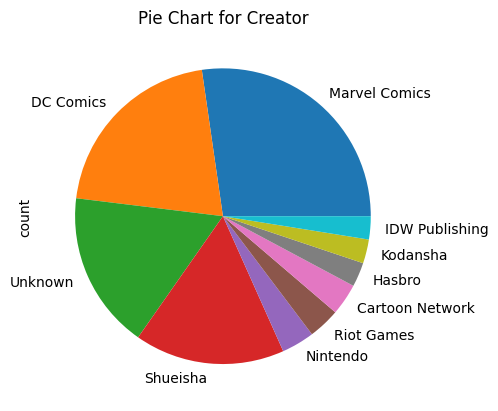

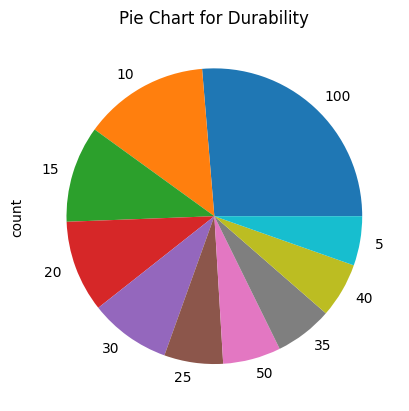

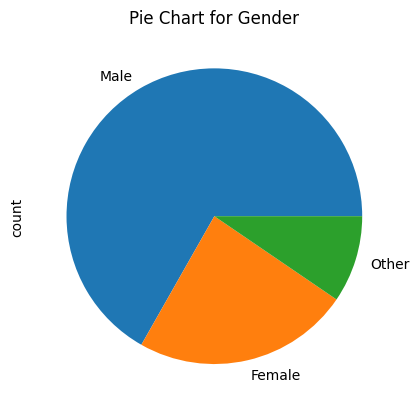

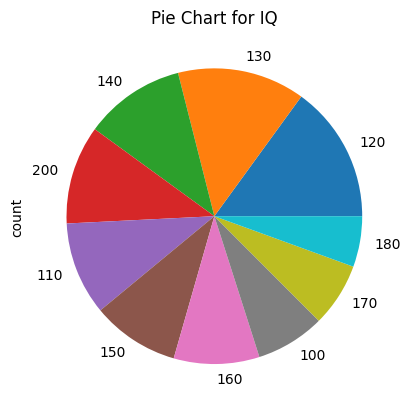

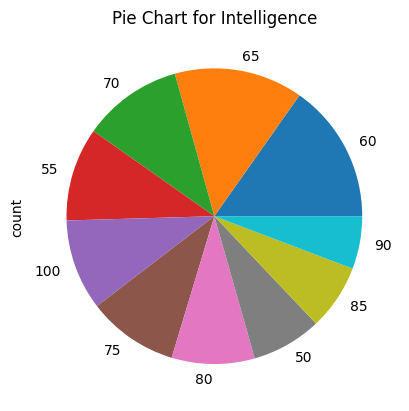

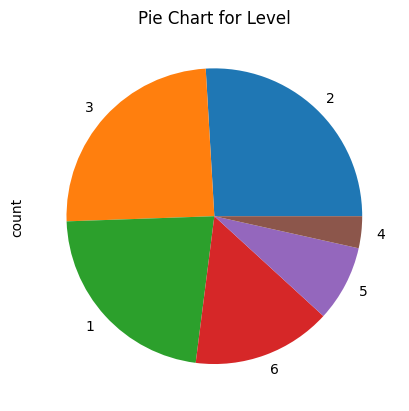

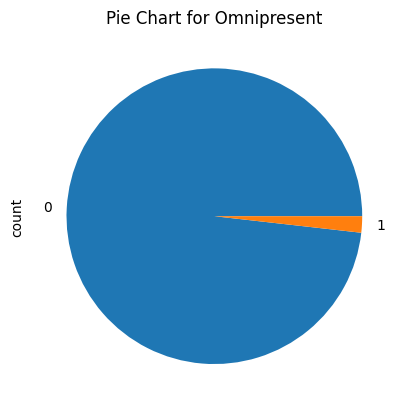

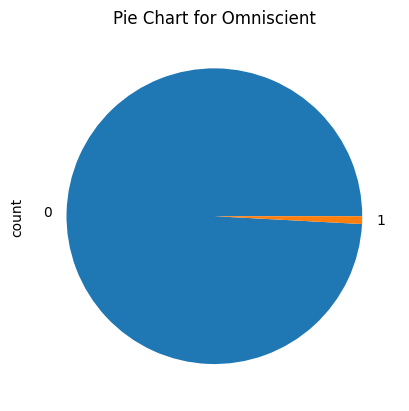

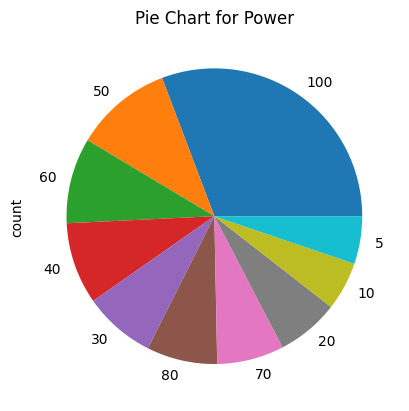

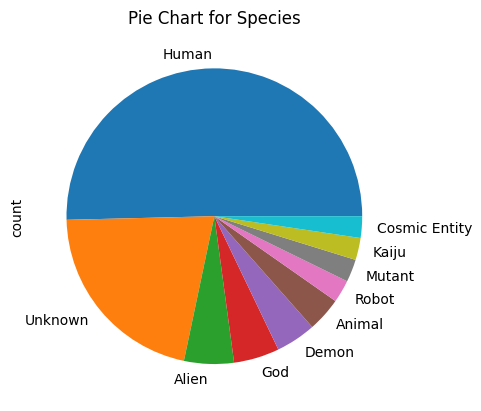

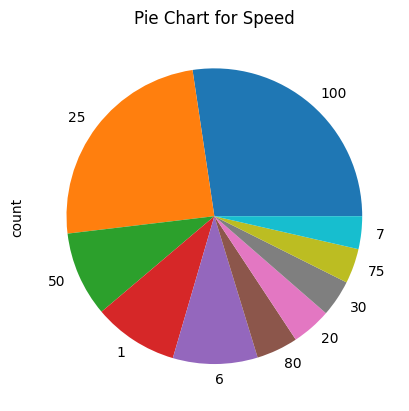

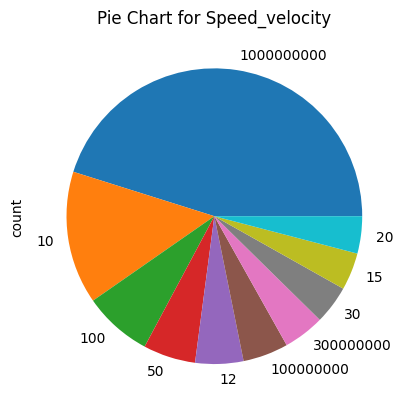

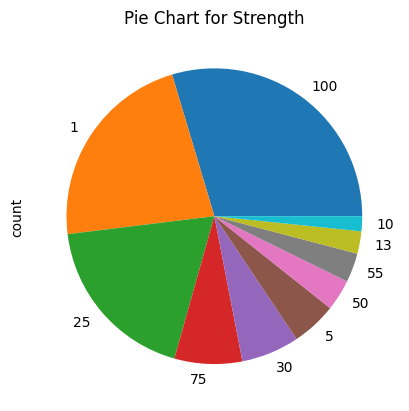

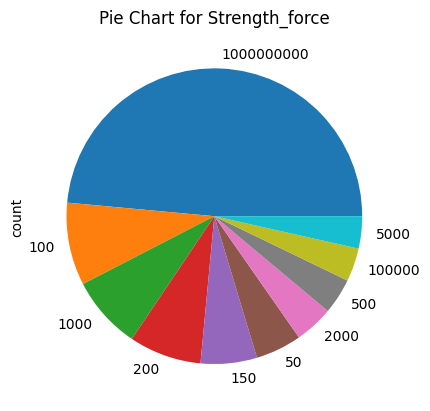

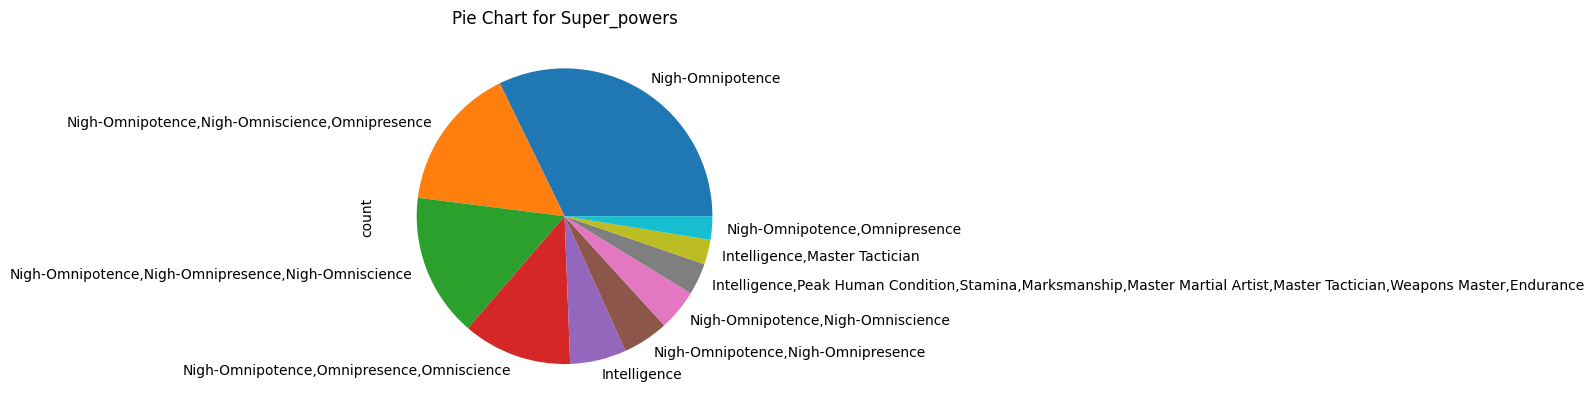

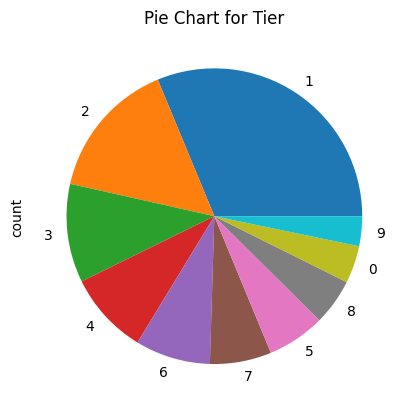

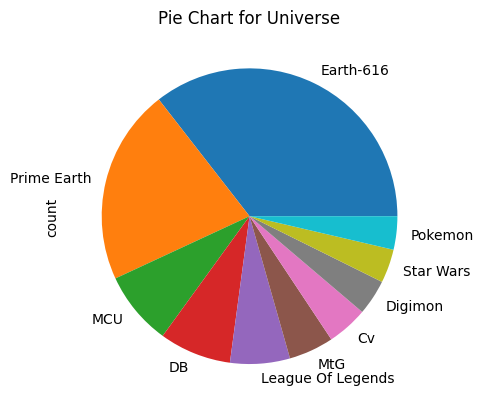

In [24]:
import matplotlib.pyplot as plt

# Plot bar chart for each column
for column in df.columns:
    df[column].value_counts().head(10).plot(kind='pie')
    plt.title(f"Pie Chart for {column}")
    plt.show()

In [25]:
df.dropna(axis=0, inplace=True)

In [26]:
df.drop('Super_powers', axis=1, inplace=True)

In [27]:
# To Do
# convert wight to float
# covnert height to float
# convert speed_velocity to int
# convert strength_force to int
# convert Class_value to int
# remove charachter 
# remove Collections (use in graph)
# remove Occupation (use in graph)
# remove place_of_birth (use in graph)
# remove Relatives (split this to use in graph)
# split Super_powers
# convert Universe to label encoding

In [28]:
df.nunique()

Alignment            3
Character         6399
Class_value       9067
Combat              33
Creator             84
Durability          34
Gender               3
IQ                 123
Intelligence        25
Level                6
Omnipresent          2
Omniscient           2
Power               34
Species             87
Speed               34
Speed_velocity     592
Strength            33
Strength_force     569
Tier                11
Universe           709
dtype: int64

In [29]:
from sklearn.preprocessing import LabelEncoder

ohe_col = ['Creator', 'Gender', 'Species', 'Universe']
lb_col = ['Alignment', 'Character']
label_encoder = {'Alignment':LabelEncoder(),
                 'Character':LabelEncoder()}
df['Alignment'] = label_encoder['Alignment'].fit_transform(df['Alignment'])
df['Character'] = label_encoder['Character'].fit_transform(df['Character'])

universe_temp = df['Universe'].copy()

df = pd.get_dummies(df, columns=ohe_col, drop_first=True, dtype=float)
df = df.astype(float)
df_graph = df.copy()
df_graph['Universe'] = universe_temp

In [30]:
label_encoder['Alignment'].inverse_transform([0,1,2])

array(['Bad', 'Good', 'Neutral'], dtype=object)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15773 entries, 0 to 27938
Columns: 895 entries, Alignment to Universe_Zelda
dtypes: float64(895)
memory usage: 107.8 MB


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15773 entries, 0 to 27938
Columns: 7292 entries, Alignment to Universe_Zelda
dtypes: float64(7292)
memory usage: 877.6 MB


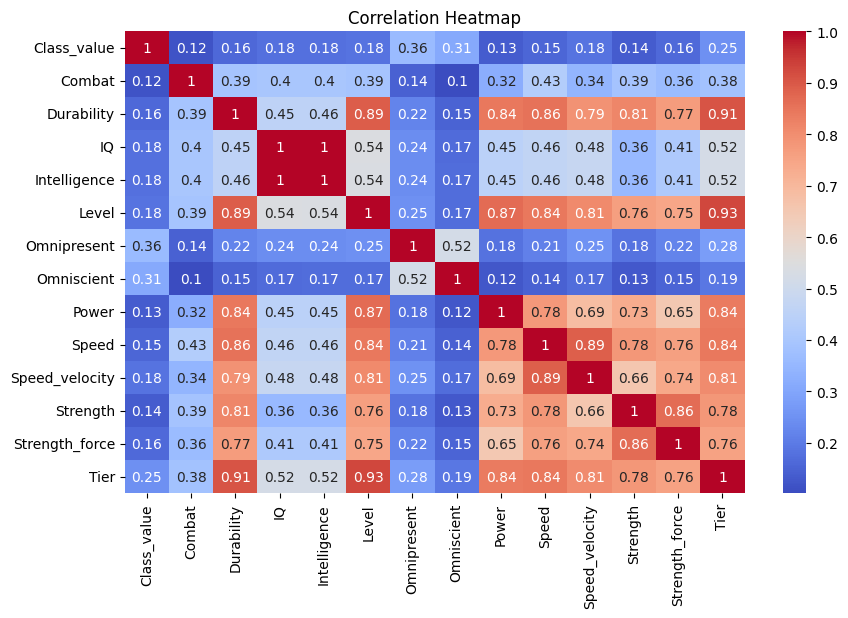

In [32]:
h_cols = df.columns[2:16]
plt.figure(figsize=(10, 6))
sns.heatmap(df[h_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [33]:
from scipy import stats

# Calculate z-scores for each column
z_scores = stats.zscore(df)

# Find outliers for each column
outliers = (z_scores > 3).any(axis=0)
df2 = df.copy()
# Print the columns with outliers
for col, is_outlier in zip(df.columns, outliers):
    if is_outlier:
        print(f"Outliers detected in column: {col}")

Outliers detected in column: Class_value
Outliers detected in column: Omnipresent
Outliers detected in column: Omniscient
Outliers detected in column: Creator_2K
Outliers detected in column: Creator_ABC Studios
Outliers detected in column: Creator_AMC
Outliers detected in column: Creator_Activision Blizzard
Outliers detected in column: Creator_Amalgam Comics
Outliers detected in column: Creator_Amazon
Outliers detected in column: Creator_Arkane Studios
Outliers detected in column: Creator_Bonelli
Outliers detected in column: Creator_Boom! Studios
Outliers detected in column: Creator_CD Projekt Red
Outliers detected in column: Creator_Capcom
Outliers detected in column: Creator_Cartoon Network
Outliers detected in column: Creator_Dark Horse Comics
Outliers detected in column: Creator_Disney
Outliers detected in column: Creator_Dreamworks
Outliers detected in column: Creator_Dynamite Entertainment
Outliers detected in column: Creator_EC Comics
Outliers detected in column: Creator_Electro

65


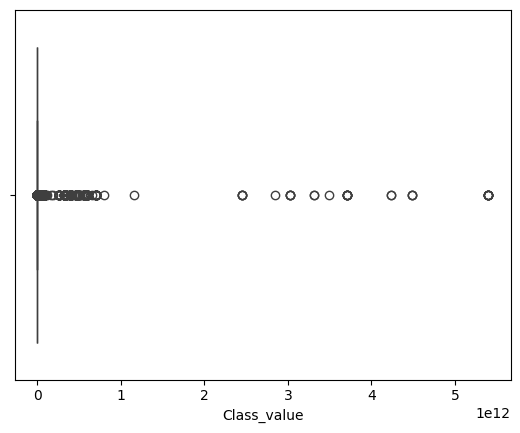

In [34]:
import seaborn as sns
import seaborn as sns
from scipy import stats

# Calculate z-scores for Class_value column
z_scores = stats.zscore(df2['Class_value'])

# Find outliers for Class_value column
outliers = df2[z_scores > 3]

# Print the number of outliers
print(len(outliers))

# Plot boxplot
sns.boxplot(x=df2['Class_value'])
# Plot boxplot
df2.drop(outliers.index,axis=0, inplace=True)

In [35]:
df2.shape

(15708, 895)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Alignment', axis=1)
y = df['Alignment']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp)

# Normalize the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# PCA

In [37]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=10)

# pca.fit(X_train_scaled)

# X_train_pca = pca.transform(X_train_scaled)

# print("Explained Variance Ratio:")
# print(pca.explained_variance_ratio_)

Explained Variance Ratio:
[0.00989917 0.00356918 0.00295467 0.00292341 0.00291402 0.00272557
 0.00260111 0.00259588 0.00253832 0.00253   ]


# Models

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import History

import matplotlib.pyplot as plt

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

dnn_model = Sequential()
dnn_model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
dnn_model.add(Dense(256, activation='relu'))
dnn_model.add(Dense(128, activation='relu'))
dnn_model.add(Dense(64, activation='relu'))
dnn_model.add(Dense(y_train.shape[1], activation='softmax'))
dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

num_params = dnn_model.count_params()
print("Number of parameters in the model:", num_params)

checkpoint_path = "model_checkpoint.h5.keras"


checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1
)

mlp_history = dnn_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    batch_size=1024,
    verbose=1,
    callbacks=[checkpoint_callback]
)
# mlp_history = dnn_model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=50, batch_size=256, verbose=1)

rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

xgb_model = XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)


c:\Users\NoA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Number of parameters in the model: 630915
Epoch 1/50
11/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4782 - loss: 1.0695
Epoch 1: val_accuracy improved from -inf to 0.60330, saving model to model_checkpoint.h5.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.4898 - loss: 1.0503 - val_accuracy: 0.6033 - val_loss: 0.8858
Epoch 2/50
11/13 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6342 - loss: 0.8136
Epoch 2: val_accuracy improved from 0.60330 to 0.62548, saving model to model_checkpoint.h5.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.6349 - loss: 0.8114 - val_accuracy: 0.6255 - val_loss: 0.8470
Epoch 3/50
12/13 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6646 - loss: 0.7433
Epoch 3: val_accuracy improved from 0.62548 to 0.63181, saving model to model_checkpoint.h5.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.6646 - loss: 0.7426 - val_accuracy: 0.6318 - val_loss: 0.8407
Epoch 4/50
11/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

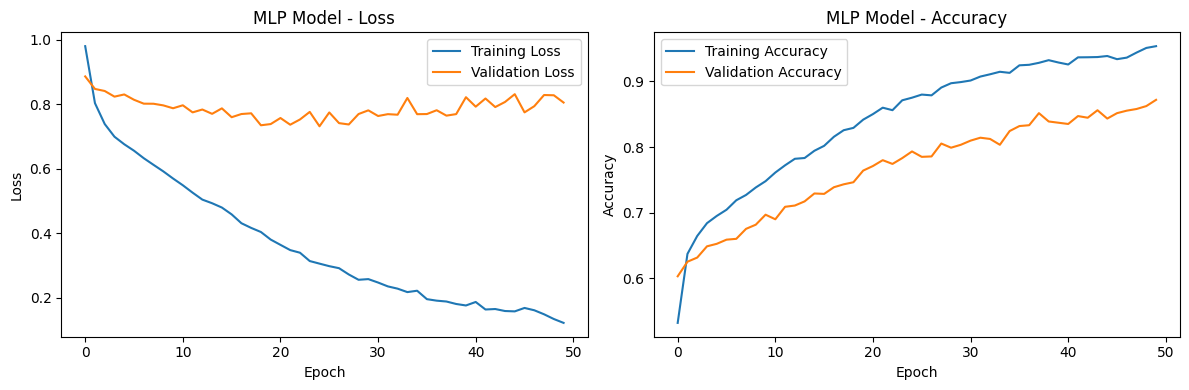

In [38]:

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(mlp_history.history['loss'], label='Training Loss')
plt.plot(mlp_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('MLP Model - Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mlp_history.history['accuracy'], label='Training Accuracy')
plt.plot(mlp_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('MLP Model - Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [39]:
from sklearn.metrics import accuracy_score

rf_predictions = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("RandomForestClassifier Accuracy:", rf_accuracy)

mlp_predictions = dnn_model.predict(X_test_scaled)
mlp_predictions = np.argmax(mlp_predictions, axis=1)
mlp_accuracy = accuracy_score(np.argmax(y_test, axis=-1), mlp_predictions)
print("MLP Model Accuracy:", mlp_accuracy)

keras_predictions = xgb_model.predict(X_test_scaled)
keras_predictions = np.argmax(keras_predictions, axis=1)
keras_accuracy = accuracy_score(np.argmax(y_test, axis=-1), keras_predictions)
print("XGB Model Accuracy:", keras_accuracy)

RandomForestClassifier Accuracy: 0.8928344958782498
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
MLP Model Accuracy: 0.8611287254280279
XGB Model Accuracy: 0.6949904882688649


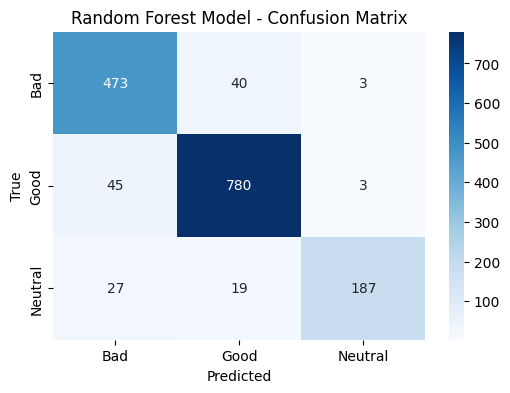

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


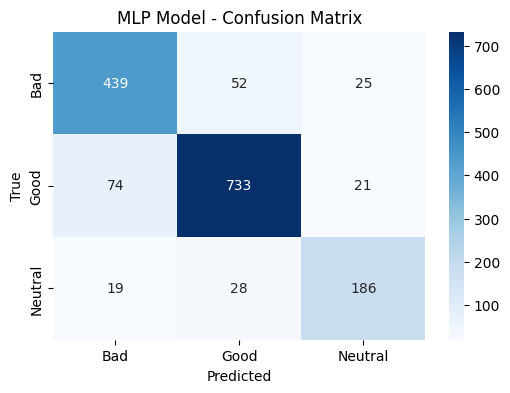

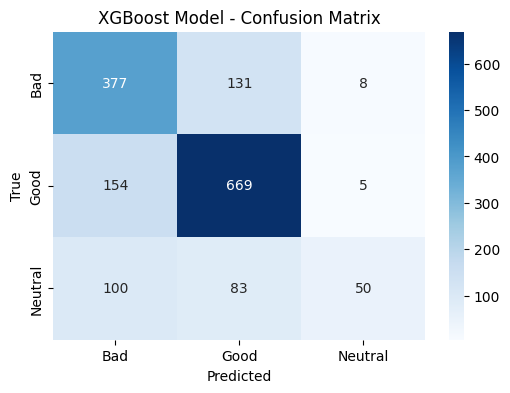

In [40]:
labels = ['Bad', 'Good', 'Neutral']
rf_predictions = rf_model.predict(X_test_scaled)

rf_cm = confusion_matrix(label_encoder['Alignment'].inverse_transform(np.argmax(y_test, axis=-1)),
                         label_encoder['Alignment'].inverse_transform(np.argmax(rf_predictions, axis=-1)))
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels = labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Model - Confusion Matrix')
plt.show()

mlp_predictions = np.argmax(dnn_model.predict(X_test_scaled), axis=-1)
mlp_cm = confusion_matrix(label_encoder['Alignment'].inverse_transform(np.argmax(y_test, axis=-1)),
                          label_encoder['Alignment'].inverse_transform(mlp_predictions))
plt.figure(figsize=(6, 4))
sns.heatmap(mlp_cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels = labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('MLP Model - Confusion Matrix')
plt.show()

xgb_predictions = xgb_model.predict(X_test_scaled)
xgb_cm = confusion_matrix(label_encoder['Alignment'].inverse_transform(np.argmax(y_test, axis=-1)),
                          label_encoder['Alignment'].inverse_transform(np.argmax(xgb_predictions, axis=-1)))
plt.figure(figsize=(6, 4))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels = labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('XGBoost Model - Confusion Matrix')
plt.show()

## Mean Accuracy

In [ ]:

X = df.drop('Alignment', axis=1)
y = df['Alignment']
total_accuracy = {'RF': 0, 'DNN': 0, 'XGB': 0}
for i in range(10):
    print(f"Running iteration {i + 1}")
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y)
    X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp)

    scaler = StandardScaler()

    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    y_train = to_categorical(y_train)
    y_val = to_categorical(y_val)
    y_test = to_categorical(y_test)

    dnn_model = Sequential()
    dnn_model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    dnn_model.add(Dense(64, activation='relu'))
    dnn_model.add(Dense(64, activation='relu'))
    dnn_model.add(Dense(y_train.shape[1], activation='softmax'))
    dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    rf_model = RandomForestClassifier()
    xgb_model = XGBClassifier()
    
    # Training
    dnn_model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=50, batch_size=256, verbose=0)
    rf_model.fit(X_train_scaled, y_train)
    xgb_model.fit(X_train_scaled, y_train)
    
    # Testing
    rf_predictions = rf_model.predict(X_test_scaled)
    rf_accuracy = accuracy_score(y_test, rf_predictions)
    total_accuracy['RF'] += rf_accuracy

    mlp_predictions = dnn_model.predict(X_test_scaled)
    mlp_predictions = np.argmax(mlp_predictions, axis=1)
    mlp_accuracy = accuracy_score(np.argmax(y_test, axis=-1), mlp_predictions)
    total_accuracy['DNN'] += mlp_accuracy

    xgb_predictions = xgb_model.predict(X_test_scaled)
    xgb_predictions = np.argmax(xgb_predictions, axis=1)
    xgb_accuracy = accuracy_score(np.argmax(y_test, axis=-1), xgb_predictions)
    total_accuracy['XGB'] += xgb_accuracy
    
print("Average Accuracy for RandomForestClassifier:", total_accuracy['RF'] / 10)
print("Average Accuracy for DNN Model:", total_accuracy['DNN'] / 10)
print("Average Accuracy for XGB Model:", total_accuracy['XGB'] / 10)

Running iteration 1


c:\Users\NoA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Running iteration 2


c:\Users\NoA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Running iteration 3


c:\Users\NoA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Running iteration 4


c:\Users\NoA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Running iteration 5


c:\Users\NoA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Running iteration 6


c:\Users\NoA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Running iteration 7


c:\Users\NoA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Running iteration 8


c:\Users\NoA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Running iteration 9


c:\Users\NoA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Running iteration 10


c:\Users\NoA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Average Accuracy for RandomForestClassifier: 0.8999365884590995
Average Accuracy for DNN Model: 0.9164870006341154
Average Accuracy for XGB Model: 0.6794546607482562


# Convert to Graph

In [42]:
import torch
from torch_geometric.utils import from_networkx
from torch_geometric.data import Data
import networkx as nx
import itertools
from tqdm import tqdm

In [43]:
# df_graph['index'] = df_graph.index
df_graph.reset_index(drop=True, inplace=True)
df_graph.head(10)

,Alignment,Character,Class_value,Combat,Durability,IQ,Intelligence,Level,Omnipresent,Omniscient,...,Universe_WotT,Universe_Xena,Universe_Xenoblade,Universe_Xenoverse,Universe_Young Justice,Universe_Yu Yu Hakusho,Universe_Yu Yu Hakusho Verse,Universe_Yu-Gi-Oh!,Universe_Zelda,Universe
0,1.0,220.0,5471.0,80.0,35.0,140.0,70.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C17S
1,1.0,220.0,5876.0,80.0,35.0,140.0,70.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C17S
2,1.0,220.0,2586011.0,90.0,100.0,160.0,80.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Castlevania
3,1.0,220.0,3380098.0,90.0,100.0,160.0,80.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Castlevania
4,1.0,220.0,1170.0,100.0,45.0,140.0,70.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ML
5,1.0,220.0,1362.0,100.0,45.0,140.0,70.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ML
6,2.0,569.0,100627.0,90.0,75.0,155.0,80.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bayonetta
7,2.0,569.0,171876.0,90.0,75.0,155.0,80.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bayonetta
8,1.0,51.0,40.0,40.0,15.0,110.0,55.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,The Hollow
9,1.0,51.0,44.0,40.0,15.0,110.0,55.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,The Hollow


In [44]:
df_graph.shape

(15773, 896)

In [45]:
node_features = df_graph.drop(['Alignment','Universe'], axis=1)
x = torch.tensor(node_features.to_numpy(), dtype=torch.float)
x.shape

torch.Size([15773, 894])

In [46]:
labels = df_graph['Alignment']
y = torch.tensor(labels.to_numpy(), dtype=torch.long)
y.shape

torch.Size([15773])

In [47]:
all_edges = np.array([], dtype=np.int32).reshape((0, 2))
universes = df_graph['Universe'].unique()
for u in tqdm(universes, desc="Processing universes"):
    u_df = df_graph[df_graph['Universe'] == u]
    characters = u_df.index
    permutation = list(itertools.permutations(characters, 2))
    edge_s = [e[0] for e in permutation]
    edge_d = [e[1] for e in permutation]
    u_edges = np.column_stack((edge_s, edge_d))
    all_edges = np.vstack([all_edges, u_edges])
edge_index = torch.tensor(all_edges.transpose(), dtype=torch.long)
display(edge_index.shape)
display(edge_index)

Processing universes: 100%|██████████| 709/709 [00:19<00:00, 36.60it/s]


torch.Size([2, 6027464])

tensor([[    0,     0,     0,  ..., 15717, 15600, 15654],
        [    1,  1322,  1323,  ..., 15485, 15654, 15600]])

In [48]:
X_train, X_temp, y_train, y_temp = train_test_split(df_graph.index, y, test_size=0.2, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp)



# Create Data object
pyg_data = Data(
    x=x,
    edge_index=edge_index,
    y=y,
    split_idx={
        'train': torch.tensor(X_train, dtype=torch.long),
        'val': torch.tensor(X_val, dtype=torch.long),
        'test': torch.tensor(X_test, dtype=torch.long)
    },
    num_classes=3
)

In [49]:
node_index = 6
node = pyg_data.x[node_index]
node_features = node.tolist()
label = pyg_data.y[node_index]

print("Node:", node_index)
print("Node Features:", node_features)
print("Label:", label)

Node: 6
Node Features: [569.0, 100627.0, 90.0, 75.0, 155.0, 80.0, 5.0, 0.0, 0.0, 100.0, 50.0, 2997925.0, 55.0, 1000000.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [50]:
print(pyg_data)

Data(
  x=[15773, 894],
  edge_index=[2, 6027464],
  y=[15773],
  split_idx={
    train=[12618],
    val=[1578],
    test=[1577],
  },
  num_classes=3
)


# Train GNN

In [51]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class SuperheroGNN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(SuperheroGNN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, out_channels)
        # self.conv4 = GCNConv(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        #  x = self.conv2(x, edge_index)
        # x = F.relu(x)
        x = self.conv3(x, edge_index)
        return F.log_softmax(x, dim=1)

hidden_channels = [8,16,32]
model = SuperheroGNN(in_channels=pyg_data.num_node_features, hidden_channels=hidden_channels[1], out_channels=pyg_data.num_classes)


In [53]:
import torch.optim as optim

learning_rate = [0.01, 0.001, 0.0001]
optimizer = optim.Adam(model.parameters(), lr=learning_rate[0])
loss_fn = torch.nn.CrossEntropyLoss()

train_losses = []
train_accuracies = []
val_accuracies = []
test_accuracies = []

def train():
    model.train()
    optimizer.zero_grad()
    out = model(pyg_data)
    loss = loss_fn(out[pyg_data.split_idx['train']], pyg_data.y[pyg_data.split_idx['train']])
    loss.backward()
    optimizer.step()
    return loss.item()

def evaluate(split):
    model.eval()
    with torch.no_grad():
        _, pred = model(pyg_data).max(dim=1)
        correct = (pred[pyg_data.split_idx[split]] == pyg_data.y[pyg_data.split_idx[split]]).sum()
        acc = int(correct) / int(pyg_data.split_idx[split].size(0))
    return acc

# num_epochs = [50, 100, 200]
# for ne in num_epochs:
#     for epoch in range(ne):
#         loss = train()
#         train_acc = evaluate('train')
#         val_acc = evaluate('val')
#         test_acc = evaluate('test')

#         train_losses.append(loss)
#         train_accuracies.append(train_acc)
#         val_accuracies.append(val_acc)
#         test_accuracies.append(test_acc)

#         print(f'Epoch {epoch + 1:03d}, Loss: {loss:.4g}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}, Test Acc: {test_acc:.4f}')

num_epochs = 50  
for epoch in range(num_epochs):
    loss = train()
    train_acc = evaluate('train')
    val_acc = evaluate('val')
    test_acc = evaluate('test')
    
    train_losses.append(loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    test_accuracies.append(test_acc)
    
    print(f'Epoch {epoch+1:03d}, Loss: {loss:.4g}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}, Test Acc: {test_acc:.4f}')


Epoch 001, Loss: 3.232e+08, Train Acc: 0.4765, Val Acc: 0.4823, Test Acc: 0.4838
Epoch 002, Loss: 2.287e+08, Train Acc: 0.3258, Val Acc: 0.3295, Test Acc: 0.3380
Epoch 003, Loss: 1.296e+08, Train Acc: 0.4493, Val Acc: 0.4360, Test Acc: 0.4572
Epoch 004, Loss: 9.188e+07, Train Acc: 0.3764, Val Acc: 0.3593, Test Acc: 0.3951
Epoch 005, Loss: 5.674e+07, Train Acc: 0.3741, Val Acc: 0.3973, Test Acc: 0.3989
Epoch 006, Loss: 6.578e+06, Train Acc: 0.3281, Val Acc: 0.3340, Test Acc: 0.3342
Epoch 007, Loss: 4.957e+07, Train Acc: 0.2645, Val Acc: 0.2497, Test Acc: 0.2739
Epoch 008, Loss: 9.609e+07, Train Acc: 0.3251, Val Acc: 0.3245, Test Acc: 0.3291
Epoch 009, Loss: 6.878e+07, Train Acc: 0.3257, Val Acc: 0.3264, Test Acc: 0.3291
Epoch 010, Loss: 6.675e+07, Train Acc: 0.2769, Val Acc: 0.2471, Test Acc: 0.2879
Epoch 011, Loss: 7.168e+07, Train Acc: 0.3596, Val Acc: 0.3523, Test Acc: 0.3608
Epoch 012, Loss: 5.032e+07, Train Acc: 0.3650, Val Acc: 0.3663, Test Acc: 0.3672
Epoch 013, Loss: 3.958e+07, 

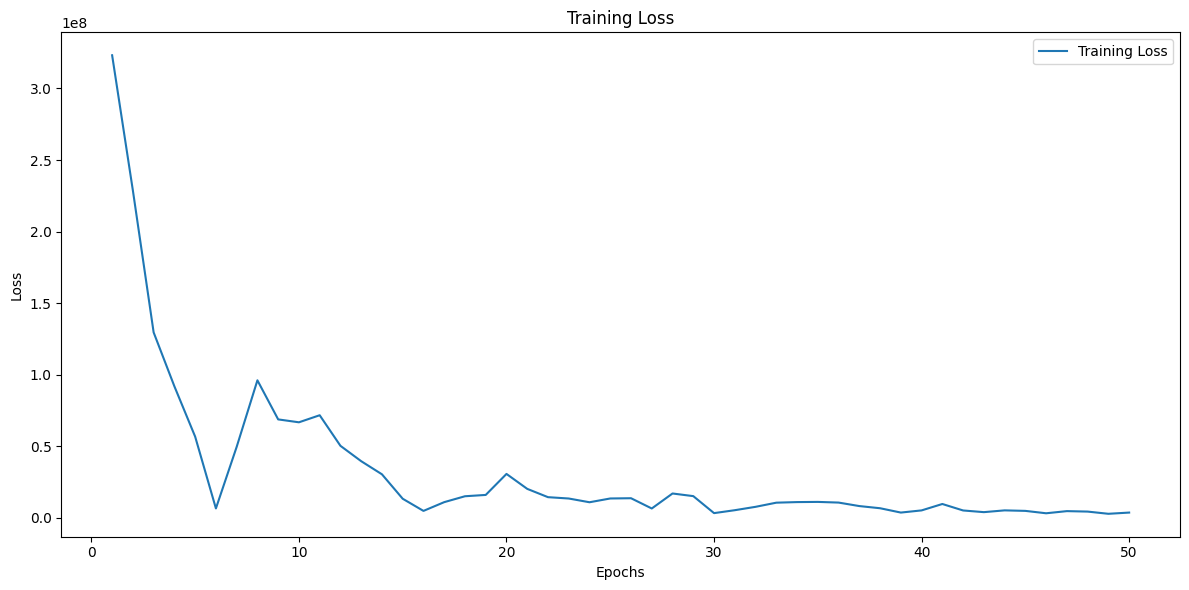

In [54]:
epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(12, 6))

plt.plot(epochs, train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss')

plt.tight_layout()
plt.show()

In [55]:
def test(split):
    model.eval()
    _, pred = model(pyg_data).max(dim=1)
    correct = (pred[pyg_data.split_idx[split]] == pyg_data.y[pyg_data.split_idx[split]]).sum()
    acc = int(correct) / int(pyg_data.split_idx[split].size(0))
    return acc

train_acc = test('train')
val_acc = test('val')
test_acc = test('test')

print(f'Train Accuracy: {train_acc:.4f}')
print(f'Validation Accuracy: {val_acc:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')


Train Accuracy: 0.4861
Validation Accuracy: 0.4899
Test Accuracy: 0.4731


In [57]:
mean_acc = 0
for i in tqdm(range(10), desc="Running 10 iterations"):
    
    X_train, X_temp, y_train, y_temp = train_test_split(df_graph.index, y, test_size=0.2, stratify=y)
    X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp)

    pyg_data = Data(
        x=x,
        edge_index=edge_index,
        y=y,
        split_idx={
            'train': torch.tensor(X_train, dtype=torch.long),
            'val': torch.tensor(X_val, dtype=torch.long),
            'test': torch.tensor(X_test, dtype=torch.long)
        },
        num_classes=3
    )

    model = SuperheroGNN(in_channels=pyg_data.num_node_features, hidden_channels=16, out_channels=pyg_data.num_classes)
    
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    loss_fn = torch.nn.CrossEntropyLoss()

    num_epochs = 50  
    for epoch in range(num_epochs):
        loss = train()
    
    test_acc = test('test')
    print(f'Iterate: {i + 1} | Test Accuracy: {test_acc:.4f}')
    mean_acc += test_acc
    
print(f'Mean Test Accuracy: {mean_acc / 10:.4f}')


Running 10 iterations:  10%|█         | 1/10 [01:45<15:45, 105.09s/it]

Iterate: 1 | Test Accuracy: 0.2955


Running 10 iterations:  20%|██        | 2/10 [03:28<13:50, 103.87s/it]

Iterate: 2 | Test Accuracy: 0.4268


Running 10 iterations:  30%|███       | 3/10 [05:08<11:55, 102.21s/it]

Iterate: 3 | Test Accuracy: 0.3938


Running 10 iterations:  40%|████      | 4/10 [06:51<10:15, 102.60s/it]

Iterate: 4 | Test Accuracy: 0.4128


Running 10 iterations:  50%|█████     | 5/10 [08:34<08:33, 102.65s/it]

Iterate: 5 | Test Accuracy: 0.4851


Running 10 iterations:  60%|██████    | 6/10 [10:14<06:46, 101.67s/it]

Iterate: 6 | Test Accuracy: 0.4318


Running 10 iterations:  70%|███████   | 7/10 [11:52<05:01, 100.55s/it]

Iterate: 7 | Test Accuracy: 0.4692


Running 10 iterations:  80%|████████  | 8/10 [13:31<03:20, 100.07s/it]

Iterate: 8 | Test Accuracy: 0.3335


Running 10 iterations:  90%|█████████ | 9/10 [15:09<01:39, 99.57s/it] 

Iterate: 9 | Test Accuracy: 0.4249


Running 10 iterations: 100%|██████████| 10/10 [16:49<00:00, 100.90s/it]

Iterate: 10 | Test Accuracy: 0.4426
Mean Test Accuracy: 0.4116


In [44]:
from tabulate import tabulate

# Define the data for the table
data = [
    ["Model", "Train Accuracy", "Validation Accuracy", "Test Accuracy"],
    ["GNN", 0.4861, 0.4899, 0.4731],
    ["DNN", 0.9557, 0.8720, 0.8611 ],
    ["GridSearchCV", -1, -1, 0.6949],
    ["RandomForestClassifier", -1, -1, 0.8928],
]

# Draw the table
table = tabulate(data, headers="firstrow", tablefmt="fancy_grid")

# Print the table
print(table)

╒════════════════════════╤══════════════════╤═══════════════════════╤═════════════════╕
│ Model                  │   Train Accuracy │   Validation Accuracy │   Test Accuracy │
╞════════════════════════╪══════════════════╪═══════════════════════╪═════════════════╡
│ GNN                    │           0.4861 │                0.4899 │          0.4731 │
├────────────────────────┼──────────────────┼───────────────────────┼─────────────────┤
│ DNN                    │           0.9557 │                0.872  │          0.8611 │
├────────────────────────┼──────────────────┼───────────────────────┼─────────────────┤
│ GridSearchCV           │          -1      │               -1      │          0.6949 │
├────────────────────────┼──────────────────┼───────────────────────┼─────────────────┤
│ RandomForestClassifier │          -1      │               -1      │          0.8928 │
╘════════════════════════╧══════════════════╧═══════════════════════╧═════════════════╛
